In [30]:
import os
import csv
import codecs
import numpy

In [31]:
# t and r before taping in correct typing

# choose the successful taping actions

def readAlltlogs():
    path = '.\\PJ0009\\data\\tlogs_' #文件夹目录  
    files= os.listdir(path) #得到文件夹下的所有文件名称  
    tlogs = []
    for file in files: #遍历文件夹
         sentence = (file.split('.')[0]).split('_')[3]
         block = (file.split('.')[0]).split('_')[2]
         if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
              f = open(path+"\\"+file, 'r', encoding = 'utf8'); #打开文件
              reader = csv.reader(f)
              flag = 0
              for line in reader:
                #print(line)
                flag = flag + 1
                if flag ==1 or flag==2:
                    continue
                if flag > 2:
                    #add sentence on tlogs
                    temp = line
                    temp.append(block)
                    temp.append(sentence)
                    tlogs.append(temp)
                    line[3] = str(int(line[3].split('.')[0])-120)
              f.close()
    #print (tlogs)
    return tlogs

In [32]:
#get and add event key into tlogList
def addEventKey(tlogList):
    temp = []
    for line in tlogList:
        
        if line[3] == '-120':
            line.append(line[4])
            temp = line
        else:
            if len(line[4])>len(temp[4]):
                n = len(line[4])-1
                str1 = line[4][n]
                line.append(str1)
            if len(line[4])<len(temp[4]):
                line.append('B')
            temp = line
    return tlogList

In [33]:
def deleteTheRows(tlogRows):
    flag = 0
    deleteList = []
    for line in tlogRows:
        if len(line)== 7:
            #print(line)
            deleteList.append(flag-1)
            deleteList.append(flag)
        flag = flag + 1
    #delete from the back (biggest index)
    deleteList1 = sorted(deleteList, reverse=True)
    for item in deleteList1:
        #print(tlogRows[item])
        del tlogRows[item]
    return tlogRows
            

In [34]:
#read fixations for one subject

def readFixationsForOneSubject(subject):
    path = ".\\PJ0009\\data\\fixations_"
    files= os.listdir(path) #得到文件夹下的所有文件名称
    fixations = []
    for file in files:
        if not os.path.isdir(file) and str(file).split('_')[1]==subject:
            f = codecs.open(path+"/"+file, 'r', encoding = 'utf8')
            reader = csv.reader(f)
            flag = 0
            for line in reader:
                flag = flag + 1
                if flag ==1:
                    continue
                if flag > 1:
                    fixations.append(line)
            f.close()
    return fixations

In [35]:
#draw histogram
def drawGraph(mean_values, std_dev, bar_labels, title):
    from matplotlib import pyplot as plt
    import numpy as np

    fig = plt.figure(figsize=(10,20))

    # draw graph
    y_pos = np.arange(len(mean_values))
    y_pos = [x for x in y_pos]
    plt.yticks(y_pos, bar_labels, fontsize=20)
    plt.barh(y_pos, mean_values, xerr=std_dev,align='center', alpha=0.4, color='b')
    plt.xticks(fontsize=20)

    # label
    plt.xlabel('fixation number', fontsize=20)
    t = plt.title(title, fontsize=20)
    plt.ylim([-1,len(mean_values)+0.5])

    plt.grid()
    
    plt.savefig(title+".png")

    plt.show()

In [36]:
def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
        return False

In [37]:
def x_cm2pic(x):
    xscale =1838-594 ; x0 = 94; xim = 500
    return x*xscale+x0+xim
    
def y_cm2pic(y):
    yscale =2524-1920 ; y0 = 1720; yim = 200
    return y*yscale+y0+yim

def xy_cm2pic(x,y):
    return [x_cm2pic(x),y_cm2pic(y)]

# return key position
def KeyToXY(key):
    keys_ = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'å', 'a', 's', 'd', 'f', 
             'g', 'h', 'j', 'k', 'l', 'ö', 'ä', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'B', ' ']
    xs = [566, 697, 828, 959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 566, 697, 828, 
          959, 1090, 1221, 1351, 1482, 1613, 1744, 1875, 740, 900, 1060, 1220, 1380, 1540, 
          1700, 1872, 1220]
    ys = [2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2044, 2248, 2248, 2248, 
          2248, 2248, 2248, 2248, 2248, 2248, 2248, 2248, 2452, 2452, 2452, 2452, 2452, 2452, 
          2452, 2455, 2656]
    if key not in keys_:
        return []
    else:
        p = keys_.index(key)
        return [xs[p], ys[p]]

In [38]:
# Distance between target Key and Eye position

def distanceKeyFixation(key, x, y):
    x1 = x_cm2pic(x)
    y1 = y_cm2pic(y)
    x2 = KeyToXY(key)[0]
    y2 = KeyToXY(key)[1]
    # convert from pixel to cm
    dis = (0.4448336*numpy.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)))/100
    
    return dis

In [41]:
def calculate(ts, te, d):
    
    import matplotlib.pyplot as plt
    import operator as op

    alltlogs = deleteTheRows(addEventKey(readAlltlogs()))

    flag = 0
    fixationForOneSubject = []
    allSubjects = []
    keyList = []
    numberList = []
    std_dev = []

    #read all subject numbers
    for line in alltlogs:
        if line[0] not in allSubjects:
            allSubjects.append(line[0])

    for item in allSubjects:
        #calculate for each subject
        fixationForOneSubject = readFixationsForOneSubject(str(item))
        fixationList = []
        for line in alltlogs:
            
            if line[0]==item and not len(KeyToXY(line[7]))==0:
                #find all tlogs for current subject
                #eventKey is in key list
                if line[3]=='-120':
                    #trialtimeBefore = float(line[3])
                    #lastKey = line[7]
                    continue
                else:
                    flag = flag + 1
                    trialtime = float(line[3])
                    eventKey = line[7]
                    fixNumber = 0
                    currentFix = -1
                    for line1 in fixationForOneSubject:
                        #current sentence, between 2 taps, how many fixations
                        #print(line1[3])
                        #######problems:
                        #1. in some fixation files, trial time was written as system time(much bigger than normal)
                        #2. in some fixation files, trial time was written as a string with characters
                        if not line1[4] == currentFix:
                            #take the first line in all same fixation lines
                            if line1[1]== line[5]:
                                #same block
                                if isNumber(line1[3]):
                                    # don't count lines with character trial time
                                    if line1[2].split('.')[0] == line[6].split('.')[0] and trialtime-ts<float(line1[3])<trialtime-te:
                                        # same sentence, time between trialtime-ts and trialtime-te (ts>te)                                        
                                        dis = distanceKeyFixation(eventKey, float(line1[5]), float(line1[6]))
                                        if 0<dis<d:
                                            #distance from target key
                                            fixNumber = 1
                                            currentFix = line1[4]

                    if len(fixationList)==0:
                        temp = []
                        temp.append(eventKey)
                        temp.append(fixNumber)
                        temp.append(1)
                        fixationList.append(temp)
                    else:
                        flag = 0
                        for line2 in fixationList:
                            if line2[0]==eventKey:
                                line2[1] = line2[1]+fixNumber
                                line2[2] = line2[2]+1
                                flag = 1
                        if flag==0:
                            temp = []
                            temp.append(eventKey)
                            temp.append(fixNumber)
                            temp.append(1)
                            fixationList.append(temp)
                    #print(fixationList)
                    #trialtimeBefore = trialtime
                    #lastKey = eventKey

        for dataLine in fixationList:
            dataLine[1] = dataLine[1]/dataLine[2]
        fixationList1 = sorted(fixationList, key = op.itemgetter(1))
        #print(fixationList1)
        for dataLine in fixationList1:
            #print(dataLine) 
            keyList.append(dataLine[0])
            numberList.append(dataLine[1])
            std_dev.append(0)
            
        
        

        title = item+'_fixations_time='+str(ts)+'-'+str(te)+'_Distance='+str(d)
        
        drawGraph(numberList, std_dev, keyList, title)
        
        keyList = []
        numberList = []
        std_dev = []
    
    

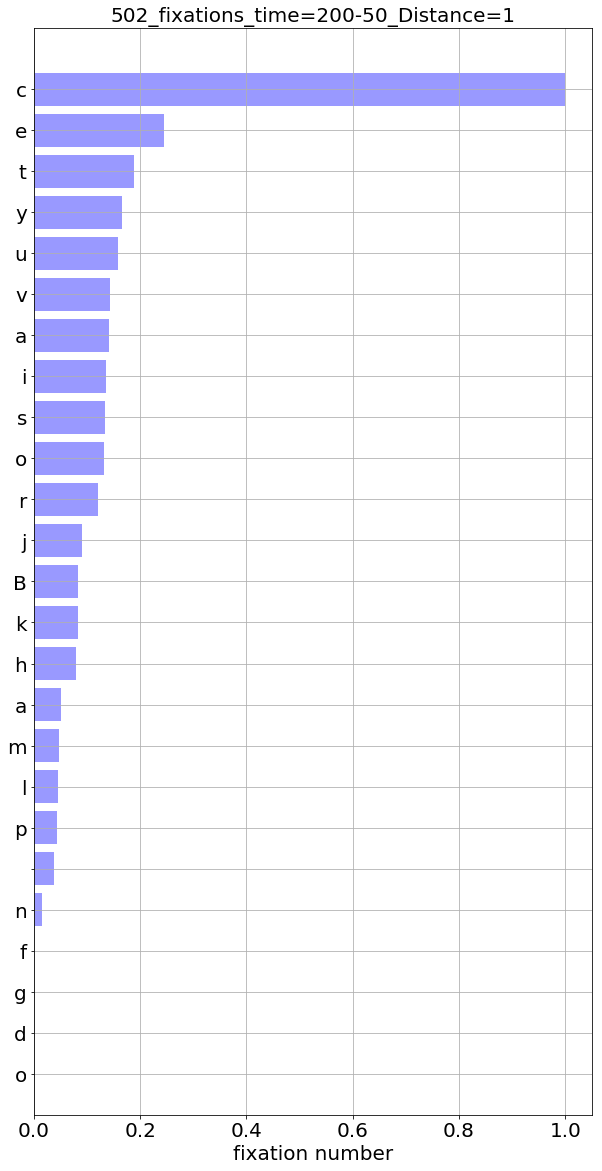

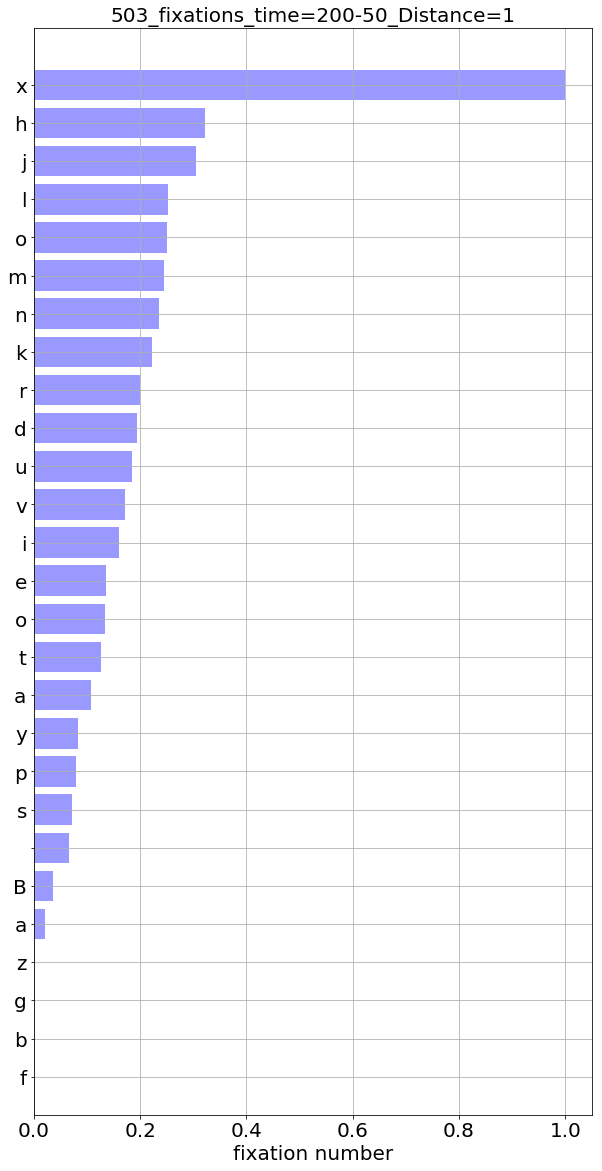

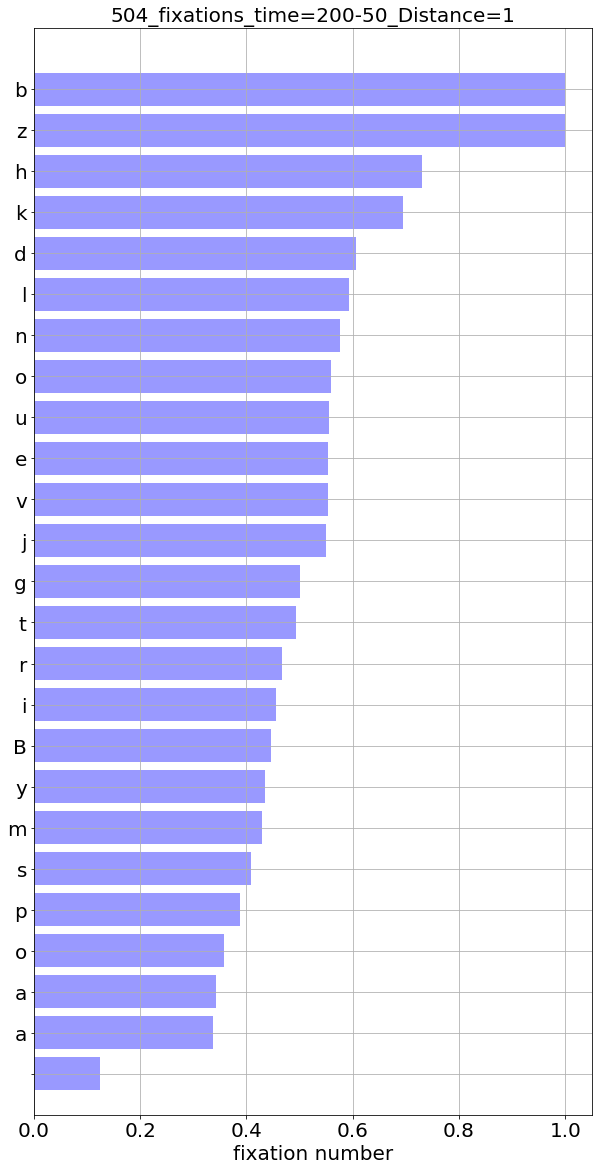

KeyboardInterrupt: 

In [43]:
calculate(200, 50, 1)